In [76]:
import numpy as np
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
from scipy.constants import G
import matplotlib.pyplot as plt
size = 1000  # Number of samples

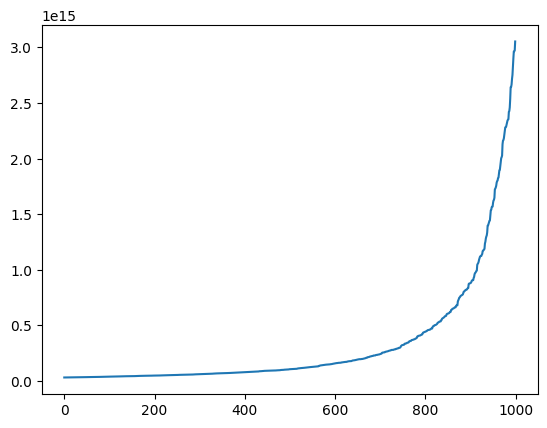

In [77]:
# Sample mass
alpha = 1.5  # Shape parameter of the power-law distribution
x_min = 10**13.5  # Minimum value of the range
x_max = 10**15.5  # Maximum value of the range

def power_law_inverse_cdf(alpha, x_min, x_max, rand):
    return ((x_max**(1-alpha) - x_min**(1-alpha)) * rand + x_min**(1-alpha))**(1/(1-alpha))

uniform_samples = np.random.uniform(0, 1, size)

mass_samples = power_law_inverse_cdf(alpha, x_min, x_max, uniform_samples)

plt.plot(sorted(mass_samples))

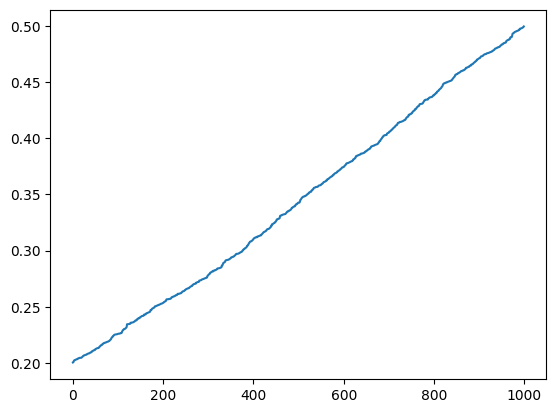

In [78]:
# Redshift overall
redshift_samples = np.random.uniform(0.2, 0.5, size)
plt.plot(sorted(redshift_samples))

In [79]:
# Calculate individual zis
def zi_based_Z(z, mass, size):
    temp = np.random.normal(z, 1/10**14.5*mass, size)
    temp = [max(0, x) for x in temp]
    return temp

# Calculate radius based on mass and redshift
def R_based_Z_M(mass, z):
    hubble_costant = cosmo.H(z).value
    pho_z = 3*hubble_costant**2/(8*np.pi*G) 
    return (mass/(4/3*np.pi)*pho_z)**(1/3)

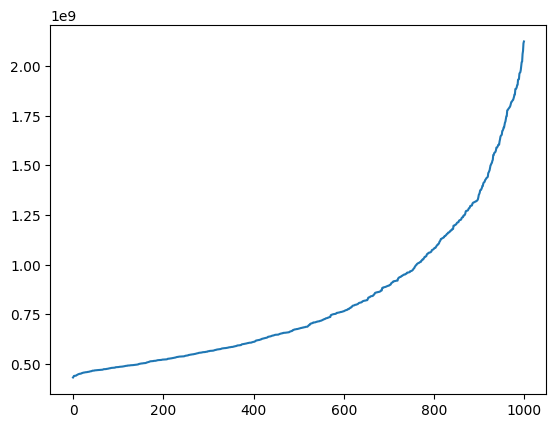

In [80]:
radius_samples = []
for i in range(size):
    radius_samples.append(R_based_Z_M(mass_samples[i], redshift_samples[i]))
plt.plot(sorted(radius_samples))

In [81]:
# Threshold for starting to decrease.
threshold = 0.6
def rate(cluster_radius, radius):
    if radius < cluster_radius*0.4:
        return 1
    elif radius > cluster_radius:
        return 0
    else:
        return 1- radius/cluster_radius

In [82]:
cluster_center_samples = tuple(zip(np.random.uniform(0, 100, size),np.random.uniform(0, 100, size)))

In [83]:
# Total samples are based on 1e6
individual_galaxies = []
for i in range(size):
    temp = []
    center = cluster_center_samples[i]
    while(len(temp) < (radius_samples[i]/1e6)):
        x = np.random.uniform(center[0] - radius_samples[i]/2, center[0] + radius_samples[i]/2)
        y = np.random.uniform(center[1] - radius_samples[i]/2, center[1] + radius_samples[i]/2)
        if np.random.random() < rate(radius_samples[i], ((x-center[0])**2 + (y - center[1])**2)**0.5):
            temp.append((x,y))
    individual_galaxies.append(temp)

In [84]:
x,y = zip(*individual_galaxies[0])

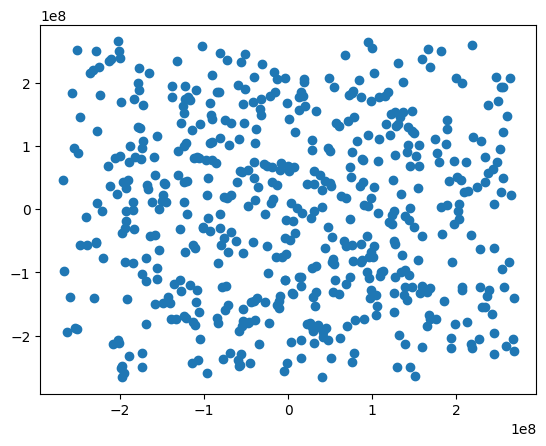

In [85]:
plt.scatter(x,y, s = 1)